# Clone a Group 

This sample notebook can be used for cloning one or more groups, either on the same portal or from one portal to another.

**Note:** If you want to clone all portal users, groups and content refer to the sample 
[Clone Portal users, groups and content](clone_portal_users_groups_and_content.ipynb)

In this sample, we will clone the [Vector Basemaps](http://www.arcgis.com/home/group.html?id=30de8da907d240a0bccd5ad3ff25ef4a) group from ArcGIS Online to an ArcGIS Enterprise.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clone-a-Group" data-toc-modified-id="Clone-a-Group-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clone a Group</a></span><ul class="toc-item"><li><span><a href="#Define-the-source-and-target-portals" data-toc-modified-id="Define-the-source-and-target-portals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Define the source and target portals</a></span></li><li><span><a href="#Search-for-the-group-and-its-contents-in-the-source-portal" data-toc-modified-id="Search-for-the-group-and-its-contents-in-the-source-portal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Search for the group and its contents in the source portal</a></span></li><li><span><a href="#Clone-the-group-in-the-target-portal-if-it-does-not-already-exist." data-toc-modified-id="Clone-the-group-in-the-target-portal-if-it-does-not-already-exist.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clone the group in the target portal if it does not already exist.</a></span></li><li><span><a href="#Clone-the-contents-of-the-group-to-the-target-portal" data-toc-modified-id="Clone-the-contents-of-the-group-to-the-target-portal-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clone the contents of the group to the target portal</a></span></li></ul></li></ul></div>

In [1]:
from arcgis.gis import GIS
from IPython.display import display

## Define the source and target portals

To start with, define the source and target portals.

In [2]:
# an anonymous connection to ArcGIS Online is sufficient, 
# since we are cloning a public group
source = GIS()

target = GIS("https://pythonapi.playground.esri.com/portal")

## Search for the group and its contents in the source portal
In the source portal, search for the group to be cloned. In our case the title of the group is 'Vector Basemaps'.

In [5]:
source_groups = source.groups.search("title:Vector Basemaps AND owner:esri", outside_org = True)
source_groups

[<Group title:"OpenStreetMap Vector Basemap" owner:esri>,
 <Group title:"Vector Basemaps" owner:esri>,
 <Group title:"Vector Basemaps (for Export)" owner:esri>]

In [7]:
source_group = source_groups[1]
source_group

<Group title:"Vector Basemaps" owner:esri>

List the items that are a part of the group 'Vector Basemaps'.

In [8]:
source_items = source_group.content()
source_items

[<Item title:"ArcGIS Vector Tile Style Editor" type:Web Mapping Application owner:esri_basemaps>,
 <Item title:"Charted Territory" type:Vector Tile Layer owner:esri>,
 <Item title:"Charted Territory Map" type:Web Map owner:esri>,
 <Item title:"Colored Pencil" type:Vector Tile Layer owner:esri>,
 <Item title:"Colored Pencil Map" type:Web Map owner:esri>,
 <Item title:"Community" type:Vector Tile Layer owner:esri>,
 <Item title:"Community Map" type:Web Map owner:esri>,
 <Item title:"Dark Gray Canvas" type:Web Map owner:esri>,
 <Item title:"Dark Gray Canvas" type:Vector Tile Layer owner:esri>,
 <Item title:"Dark Gray Canvas (Local Language)" type:Web Map owner:esri>,
 <Item title:"Dark Gray Canvas Base" type:Vector Tile Layer owner:esri>,
 <Item title:"Dark Gray Canvas Reference" type:Vector Tile Layer owner:esri>,
 <Item title:"Dark Gray Canvas Reference (Local Language)" type:Vector Tile Layer owner:esri>,
 <Item title:"Human Geography Base" type:Vector Tile Layer owner:esri>,
 <Item ti

## Clone the group in the target portal if it does not already exist. 

We create a new group in the target portal with all the properties of the group in the source portal. 

<Group title:"Vector Basemaps" owner:arcgis_python>
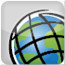

In [9]:
import tempfile
if not target.groups.search('Vector Basemaps'):
    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            thumbnail_file = source_group.download_thumbnail(temp_dir)
            
            #create a group in the target portal with all the properties of the group in the source
            target_group = target.groups.create(title = source_group.title,
                                                 tags = source_group.tags,
                                                 description = source_group.description,
                                                 snippet = source_group.snippet,
                                                 access = source_group.access, 
                                                 thumbnail= thumbnail_file,
                                                 is_invitation_only = True,
                                                 sort_field = 'avgRating',
                                                 sort_order ='asc',
                                                 is_view_only=True)
            #display the group
            display(target_group)
            
    except Exception as e:
        print('Group {} could not be created'.format(source_group.title))
        print(e)
else:
    print('Group {} already exists in the portal'.format(source_group.title))
    target_group = target.groups.search('Vector Basemaps')[0]


## Clone the contents of the group to the target portal
It is possible that some items to be cloned may already be present on the target portal. In such a situation, we simply share those items with the target group. Thus, in the section below, we renew our list of items to be cloned by removing from it, any item that was existing on the target portal beforehand.

In [10]:
#making a list for the items to be cloned in the target portal
items_to_be_cloned = list(source_items)

#checking for the presence of the item in the target portal 
for item in source_items:
    searched_items = target.content.search(query='title:'+item.title, item_type = item.type)   
    
    for s_item in searched_items:
        
        if s_item.title == item.title:
            
            #if an item is not a part of the group in the target portal then share it 
            if s_item not in target_group.content():
                s_item.share(groups= [target_group])
            
            #remove the already existing item from the list of items to be cloned
            items_to_be_cloned.remove(item)                
            
            #display the item
            display(s_item)      
                     
            break


Now after having removed the existing items from the list of items to be cloned, we can easily copy the remaining content of the source group to the newly created group in the target portal.  

<Item title:"ArcGIS Vector Tile Style Editor" type:Web Mapping Application owner:arcgis_python>
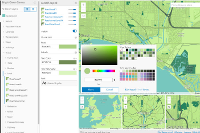

<Item title:"Charted Territory" type:Vector Tile Layer owner:arcgis_python>
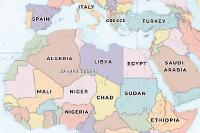

<Item title:"Charted Territory Map" type:Web Map owner:arcgis_python>
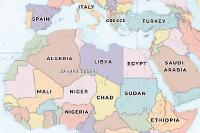

<Item title:"Colored Pencil" type:Vector Tile Layer owner:arcgis_python>
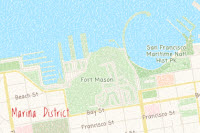

<Item title:"Colored Pencil Map" type:Web Map owner:arcgis_python>
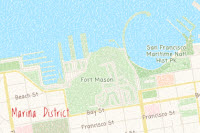

<Item title:"Community" type:Vector Tile Layer owner:arcgis_python>
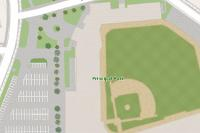

<Item title:"Community Map" type:Web Map owner:arcgis_python>
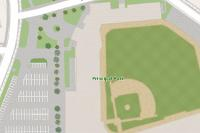

<Item title:"Dark Gray Canvas" type:Web Map owner:arcgis_python>
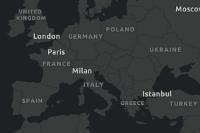

<Item title:"Dark Gray Canvas" type:Vector Tile Layer owner:arcgis_python>
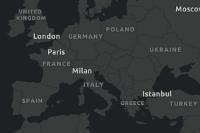

<Item title:"Dark Gray Canvas (Local Language)" type:Web Map owner:arcgis_python>
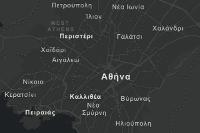

<Item title:"Dark Gray Canvas Base" type:Vector Tile Layer owner:arcgis_python>
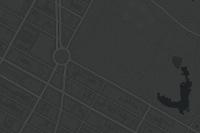

<Item title:"Dark Gray Canvas Reference" type:Vector Tile Layer owner:arcgis_python>
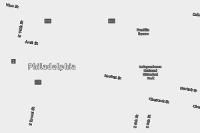

<Item title:"Dark Gray Canvas Reference (Local Language)" type:Vector Tile Layer owner:arcgis_python>
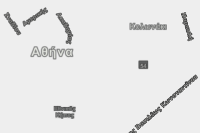

<Item title:"Human Geography Base" type:Vector Tile Layer owner:arcgis_python>
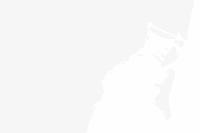

<Item title:"Human Geography Dark Base" type:Vector Tile Layer owner:arcgis_python>
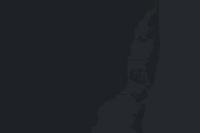

<Item title:"Human Geography Dark Detail" type:Vector Tile Layer owner:arcgis_python>
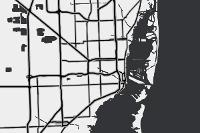

<Item title:"Human Geography Dark Label" type:Vector Tile Layer owner:arcgis_python>
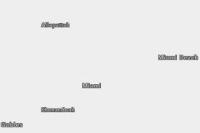

<Item title:"Human Geography Dark Map" type:Web Map owner:arcgis_python>
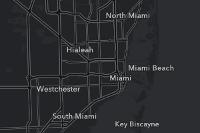

<Item title:"Human Geography Detail" type:Vector Tile Layer owner:arcgis_python>
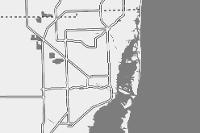

<Item title:"Human Geography Label" type:Vector Tile Layer owner:arcgis_python>
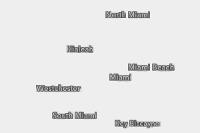

<Item title:"Human Geography Map" type:Web Map owner:arcgis_python>
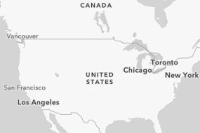

<Item title:"Hybrid Reference Layer" type:Vector Tile Layer owner:arcgis_python>
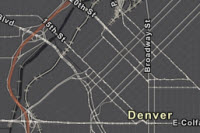

<Item title:"Hybrid Reference Layer (Local Language)" type:Vector Tile Layer owner:arcgis_python>
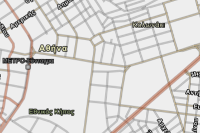

<Item title:"Imagery Hybrid" type:Web Map owner:arcgis_python>
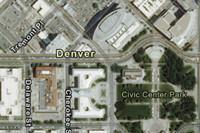

<Item title:"Imagery Hybrid (Local Language)" type:Web Map owner:arcgis_python>
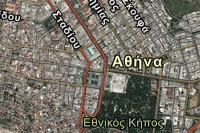

<Item title:"Light Gray Canvas" type:Web Map owner:arcgis_python>
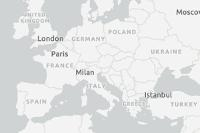

<Item title:"Light Gray Canvas" type:Vector Tile Layer owner:arcgis_python>
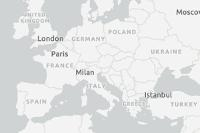

<Item title:"Light Gray Canvas (Local Language)" type:Web Map owner:arcgis_python>
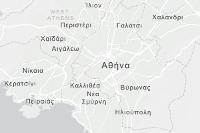

<Item title:"Light Gray Canvas Base" type:Vector Tile Layer owner:arcgis_python>
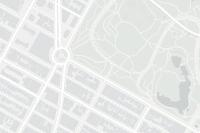

<Item title:"Light Gray Canvas Reference" type:Vector Tile Layer owner:arcgis_python>
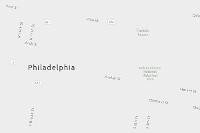

<Item title:"Light Gray Canvas Reference (Local Language)" type:Vector Tile Layer owner:arcgis_python>
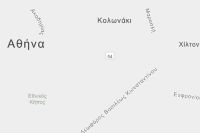

<Item title:"Mid-Century" type:Vector Tile Layer owner:arcgis_python>
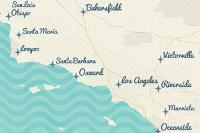

<Item title:"Mid-Century Map" type:Web Map owner:arcgis_python>
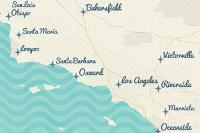

<Item title:"Modern Antique" type:Vector Tile Layer owner:arcgis_python>
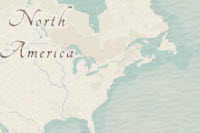

<Item title:"Modern Antique Map" type:Web Map owner:arcgis_python>
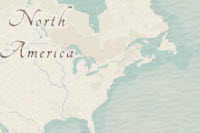

<Item title:"National Geographic Style" type:Vector Tile Layer owner:arcgis_python>
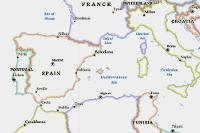

<Item title:"National Geographic Style Map" type:Web Map owner:arcgis_python>
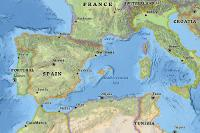

<Item title:"Navigation" type:Web Map owner:arcgis_python>
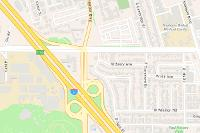

<Item title:"Navigation (Local Language)" type:Web Map owner:arcgis_python>
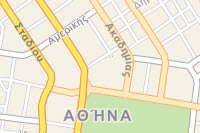

<Item title:"Newspaper" type:Vector Tile Layer owner:arcgis_python>
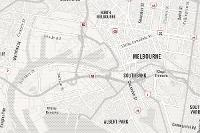

<Item title:"Newspaper Map" type:Web Map owner:arcgis_python>
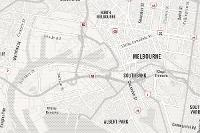

<Item title:"Nova" type:Vector Tile Layer owner:arcgis_python>
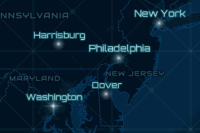

<Item title:"Nova Map" type:Web Map owner:arcgis_python>
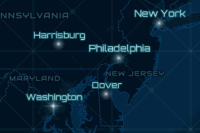

<Item title:"Ocean Basemap" type:Web Map owner:arcgis_python>
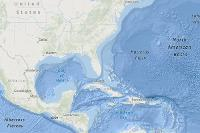

<Item title:"OpenStreetMap" type:Vector Tile Layer owner:arcgis_python>
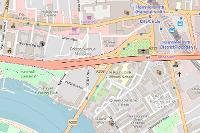

<Item title:"OpenStreetMap Vector Basemap" type:Web Map owner:arcgis_python>
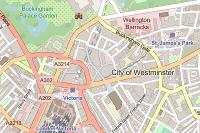

<Item title:"Streets" type:Web Map owner:arcgis_python>
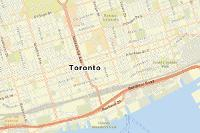

<Item title:"Streets (Local Language)" type:Web Map owner:arcgis_python>
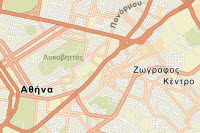

<Item title:"Streets (Night - Local Language)" type:Web Map owner:arcgis_python>
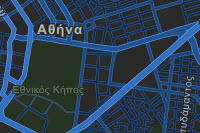

<Item title:"Streets (Night)" type:Web Map owner:arcgis_python>
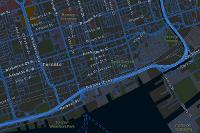

<Item title:"Streets (with Relief)" type:Web Map owner:arcgis_python>
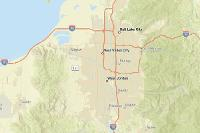

<Item title:"Terrain with Labels" type:Web Map owner:arcgis_python>
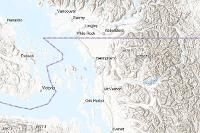

<Item title:"Terrain with Labels (Local Language)" type:Web Map owner:arcgis_python>
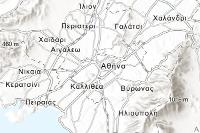

<Item title:"Topographic" type:Web Map owner:arcgis_python>
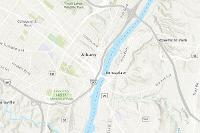

<Item title:"Topographic (Local Language)" type:Web Map owner:arcgis_python>
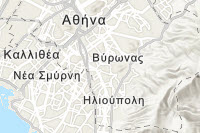

<Item title:"World Navigation Map" type:Vector Tile Layer owner:arcgis_python>
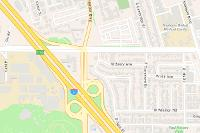

<Item title:"World Navigation Map (Local Language)" type:Vector Tile Layer owner:arcgis_python>
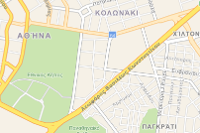

<Item title:"World Ocean Reference" type:Vector Tile Layer owner:arcgis_python>
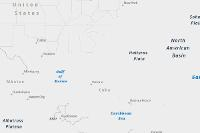

<Item title:"World Street Map" type:Vector Tile Layer owner:arcgis_python>
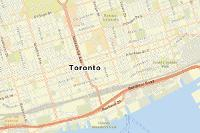

<Item title:"World Street Map (Local Language)" type:Vector Tile Layer owner:arcgis_python>
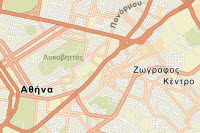

<Item title:"World Street Map (Night - Local Language)" type:Vector Tile Layer owner:arcgis_python>
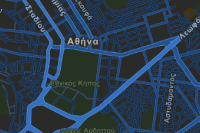

<Item title:"World Street Map (Night)" type:Vector Tile Layer owner:arcgis_python>
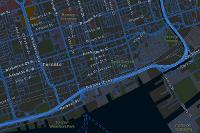

<Item title:"World Street Map (with Relief)" type:Vector Tile Layer owner:arcgis_python>
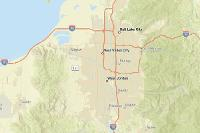

<Item title:"World Terrain Base" type:Vector Tile Layer owner:arcgis_python>
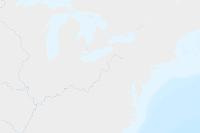

<Item title:"World Terrain Reference" type:Vector Tile Layer owner:arcgis_python>
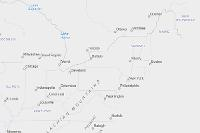

<Item title:"World Terrain Reference (Local Language)" type:Vector Tile Layer owner:arcgis_python>
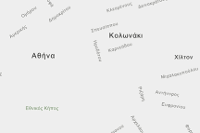

<Item title:"World Terrain with Labels" type:Vector Tile Layer owner:arcgis_python>
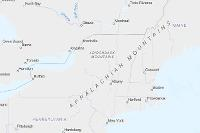

<Item title:"World Topographic Map" type:Vector Tile Layer owner:arcgis_python>
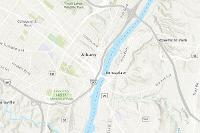

<Item title:"World Topographic Map (Local Language)" type:Vector Tile Layer owner:arcgis_python>
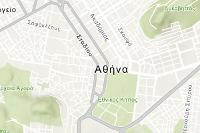

In [11]:
#cloning all items that were not present on the portal before
for item in items_to_be_cloned:    
    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            thumbnail_file = item.download_thumbnail(temp_dir)
            metadata_file = item.download_metadata(temp_dir)
            target_item_properties = {'title': item.title,
                                      'tags': item.tags,
                                      'text':item.get_data(True),
                                      'type':item.type,
                                      'url':item.url
                                     }       
            #create an item
            target_item = target.content.add(target_item_properties, thumbnail=thumbnail_file)
            
            #share that item with the group on the target portal
            target_item.share(groups=[target_group])
            
            #display the item
            display(target_item)
            
    except Exception as e:
        print('Item {} could not be created in the target portal'.format(item.title))
        print(e)